# Navie Bayesian


## 5.2 문제

스팸인지 아닌지, 긍정인지 부정인지, 불량인지 아닌지와 같은 **분류** 문제가 있다고 하자.
Logistic Regression, 의사결정트리와 같은 지도기계학습과 더불어 Naive Bayesian도 분류에 적용할 수 있다.
NB는 베이즈 정리 Bayes' theorem에 따라 확률계산을 하지만, 변인 간에 **독립적, 즉 naive한 관계**를 가정하고 적용된다.

확률을 계산해서 분류의 문제를 푸는 경우에 유의할 점이 있다.
* 속성의 값이 **비연속적**, 예를 들어 단어의 발생빈도에 따라 정서를 분류하거나, 또는 **연속적**인 값을 가지는 몸무게, 키, 발크기에 따라 성별을 구분하는 경우,
* 분류하고자 하는 대상이 **이진적 binary** 또는 **다항적 multiclass**인지에 따라,
* 또는 **사전확률**을 알 수 있는지, 알 수 있다면 어떤 분포를 따르는지 분별해야 한다.

## 5.3 확률에 대한 관점

확률에 대한 관점은 빈도주의자와 베이지안으로 구분하여 볼 수 있다.
**빈도주의자 frequentists**는 확률이란 오랫 동안 반복하면 기대하는 빈도, 즉 P(A) = n/N, n은 N회 반복했을 경우 A의 기대 값이라고 주장한다 (objective, physical). 주사위를 던지는 경우, 발생할 수 있는 경우의 수는 1, 2, 3, 4, 5, 6이고, 주사위가 공평하게 만들어져 있기 때문에 객관적으로 발생할 수 있는 빈도는 1/6로 확률이 정해진다. 무작위로, 충분히 샘플링을 하여 발생한 과거의 데이터로 계산한다. 1회 던지는 경우, 1/6이라는 정확한 확률이 나오지 않을 수 있다. 사전 지식은 무의미하게 된다. 빈도주의자는 가설을 설정하고, 실험을 하고, 결과를 통해 가설이 맞는지 통계적 추정을 할 경우, 그 값이 정해져 있다고 본다. 예를 들어, 모집단이 정규분포를 따른다고 하면, 평균은 어떤 확률로 신뢰구간 내에 반드시 그 값이 존재한다.

**베이지안 Bayesian**은 확률이란 불확실한 사건에 대한 주관이나 자신이 믿고 있는 정도에 따라 확률이 정해진다고 생각한다 (epistemic, evidential, subjective, degree of belief). 
주사위를 던지는 경우에도 현재의 주관적 믿음에 따라 확률을 정하고, 정보가 추가적으로 주어지면, 그에 따라 갱신된다. 따라서 정보가 부족하므로 1) 사전확률prior을 정하고, 2) 주어지는 증거에 따라 갱신likelihood, 3) 사후확률posterior 추정한다. 평균 값을 추정을 할 경우, 그 값은 불확실하며 분포에 따라 신뢰구간 내에 존재할 수도 있고 없을 수도 있다.

## 5.4 베이지안 확률

### 5.4.1 판단 오류

베이지안으로 생각하면 판단의 오류가 왜 비롯되는지 알 수 있다.
어떤 사람이 무죄임에도 불구하고, 검사는 **증거가 발견되었으니 당신은 유죄**라고 한다면 얼마나 억울하겠는가?

　| 유죄  | 무죄 | 합계
---|---|---|---
증거 | 1 | 10 | 11
증거 x | 0 | 9,999,990 | 9,999,990
합계 | 1 | 10,000,000 | 10,000,001


(출처: 위키피디아)

필요한 것은 p(유죄|증거), 증거가 발견되었을 경우, 그 사람이 유죄인지 무죄인지를 따져야 한다.
그러나 **P(증거|무죄), 즉 무죄이지만 증거가 발견될 백만분의 1**, 표에서 보듯이, **확률이 매우 적기 때문에 유죄**라는 판단을 하는 것이다.

즉 P(유죄|증거)를 올바르게 판단하려면, P(증거|유죄)에 P(유죄)를 곱해서 P(증거)로 나눈 값을 계산해야 한다.
* P(유죄) = $\frac{1}{10,000,001}$ 그 사람이 유죄일 **사전확률**. 그 사람이 유죄라는 확률은 미리 알기 어렵다.
* P(증거|유죄) = $\frac{1}{1}$, 그 사람이 유죄라면 증거가 일치하는 확률
* P(증거) = $\frac{11}{10,000,001}$ 유무죄 상관없이 증거가 발견되고 일치할 확률

간과하기 쉬운 것은, 무죄라고 추정되지만 증거가 발견될 확률이 적지만, 10/10,000,000건이 존재한다는 사실이다. 예를 들어, 지문이 흉기에서 발견되었지만, 사건 이전에 용의자가 만지거나, 사건에 개입되면서 닿았거나, 또는 사건 후에 만져서 생겼을 수 도 있다. 또는 용의자가 거의 확실한 알리바이를 가지고 있다면 유죄일 확률은 지문이 발견될 확률보다 매우 적게 된다.

잘못된 판단은 **p(증거|유죄) = p(유죄|증거)**라고 믿는 것이다.
즉, "유죄이므로 증거가 나왔다"를 "증거가 나왔으니 유죄다"라고 판단, 예를 들어, 지문이 나왔다고 해서, 그 사람을 범인으로 단정해서는 안되는 것이다. **증거가 나왔다고 하더라도 유죄가 아니라 무죄일 확률**이 있는 것이다. 매우 확실한 알리바이를 가지고 있다면, 지문이 나오든 나오지 않든 범인이 아닐 가능성이 높은 것이다. 베이지안은 이런 판단이 잘 못되었다는 것을 알려주고 있다.

이런 판단은 일상생활에서도 많다.
'몇 일 동안이나 답전화를 하지 않다니, 나를 더 이상 사랑하지 않나봐',
'어떻게 나에게 그런 말을 할 수 있어, 아주 나쁜 사람이야'라는 판단도 역시 오류일 수 있다.

어떤 증거에 따라 그 사람을 판단하는, 즉 P(그 사람이 나를 더 이상 사랑하지 않아|몇 일 동안 답전화가 없다)라는 $P(\theta|D)$를 확신하는 것은 $P(D|\theta)$를 충분히 고려하지 못하는 오류를 포함할 수 있다는 점이다.
그 사람이 다른 이유로 답전화를 못하거나, 학교에서 성적이 F를 받고 화를 내거나 할 수 있는 확률이 있다.

### 5.4.2 베이지안 추론

베이지안에서는 어떤 가설을 평가하기 위해, 먼저 (1) 사전확률 $P(\theta)$을 예상하고, 여기에 관측된 데이터로부터 계산된 (2) 가능성 likelihood $P(D|\theta)$을 곱하고, (3) P(D)로 나누어, 사후확률을 계산하여 추론하게 된다. 

$P(\theta|D) = \frac{P(D|\theta) P(\theta)}{P(D)}$

P(D)는 사후확률을 확률분포로 만들게 하는 정규화 상수이다. 즉 P(D)로 나누어주면 사후확률분포의 합이 1이 되게 한다.
추론을 할 때는 최대값을 구하기만 하면 되므로, 위 식에서 분모 P(D)를 생략하면 아래와 같다. 좌측 사후확률이 우측 계산식과 동일하지 않기 때문에, 비례관계에 있다고 (propotional to) 한다.

$P(\theta|D) \propto P(D|\theta) \cdot P(\theta)$

즉 사후확률은 ∝ 가능도 × 사전확률로 계산할 수 있다.

또는, 로그를 취해서, $log P(D | \theta) + log P(\theta)$을 사용해서 추론할 수 있다.

### 5.4.3 사전확률

베이지안에서의 사전확률은 어떤 사건이 얼마나 발생할 것인지
아무런 증거도 없는 상황에서의 **개인적인 믿음의 정도**를 말한다.
예를 들어, 야구에서 타자가 안타를 칠 것인지 아닌지 100회 출장에서 25회의 안타를 기록했다고 하면 P(안타)=0.25이고 아닌 경우는 0.75가 된다.

사전확률을 **모르는 경우, 균등분포 uniform distribution**을 따른다고 가정하고, 모든 사건이 동일한 확률로 발생한다고 예상할 수 있다. 또는 사전확률 $P(\theta)$의 분포가 사후확률 $p(\theta|D)$의 분포와 같은 유형이라고 가정할 수도 있다. 실제 계산해 보면, 사후확률은 사전확률에 likelihood를 갱신하기 때문에 매우 유사한 분포를 가진다.
이 경우 사전, 사후 확률의 분포를 컬레분포, conjugate distributions라고 하고, **가능도를 갱신할 때 쓰이는 사전확률을 '켤레 사전확률, conjugate prior'**이라고 한다.
예를 들어, 가능도가 정규분포를 따르고 이 경우 **사전확률을 정규분포로 하면 사후확률도 컬레로 정규분포**를 따르게 된다. likelihood가 특정 분포를 따른다고 가정할 경우, 사전확률과 사후확률은 동일한 분포를 따르게 된다 (Raiffa & Schlaifer, 1961). 이 가정에 따르면, **사후확률을 계산할 때, 분모계산을 하지 않게 하지 않아도** 된다. 예를 들어, 동전던지기는 **이항분포를 가진 사후확률의 사전확률도 이항분포**라고 할 경우, **베타분포를 conjugate prior로 사용**한다. 

* likelihood가 정규분포를 따르면 Gaussian, 컬레확률은 Gaussian
* 다항분포일 경우, 컬레확률은 Dirichlet (예: 토픽모델링 lda)
* 포아손분포일 경우, gamma

### 5.4.4 가능도

가능도 likelihood를 계산할 경우, 속성 간의 관계성을 무시하고 계산한다. **독립적**이란 사건의 발생이 서로 영향이 주고 받지 않는다는 의미이다. 동전을 2개 던지면 앞면이 나올지 뒷면이 나올지 서로 독립적이다.
예를 들어, 어떤 단어들이 발생한 경우 어느 클래스에 속하는지 계산한다고 하자. 단어간의 관계가 서로 독립적이라고 가정하고 **각 단어의 발생확률만을 서로 곱**하여 확률을 계산한다. 그러면 아래 첫번 째 식은 두번째 식으로 변환될 수 있다.

$
\begin{align}
P(C_k \vert x_1, \dots, x_n)
    & \varpropto P(C_k, x_1, \dots, x_n) \\
    & \varpropto P(C_k) P(x_1 \vert C_k) \
         P(x_2\vert C_k) P(x_3\vert C_k) \cdots \\
    & \varpropto P(C_k) \prod_{i=1}^n P(x_i \vert C_k)
\end{align}
$

이런 가정을 하는 이유는 계산의 복잡성을 줄이기 위한 가정이다. 예를 들어, 속성이 2가지 값을 갖고, 이러한 속성이 5개 있다면 $2^5=512$ 경우의 확률을 계산해야 하지만, NB의 경우, $2 \times 5 = 10$개를 계산하면 된다.

계산하면서, 식에서 발생한 건수가 없어서 확률 계산을 하면서 0이 되는 문제가 있다.
0값으로 나누어지는 것을 막기 위해 임의로 적은 수를 더하여 주는 Laplace smooting을 적용하게 된다.

$ P(x)=\frac{count(x) + \alpha}{N + \alpha \vert x \vert}$

* count(x) x의 발생건수
* |x|는 발생가능한 사건의 수
* $\alpha$는 조절변수. 0이면 조절이 없게 되고, 1이면 add-one smoothing
* N은 x의 총발생건수

예를 들어, 메시지는 스팸이거나 아니 경우 2가지가 있다고 하자.

$ P(메시지가 스팸) = \frac {스팸메시지갯수 + k} {전체메시지갯수 + k \times 메시지분류갯수}$

전체3개 가운데 3개 모두 스팸인 경우, 그리고 2가지로 분류하므로 k=2

$ \frac{3 + 2 }{3 + 2 \times 2}= \frac {5}{7}$

## 5.5 Navie Bayesian algorithm

* input: 문서와 문서별로 할당된 클래스 (D, c)
* output: 문서의 분류 클래스
* for c $\in$ C 모든 클래스에 대해 ($\in$은 "belongs to" 혹은 "is in the set of", 즉 C에 속하는 모든 c)
    * $ \frac{N_c} {N}$ 클래스가 발생할 사전확률을 구한다 ($N_c$ 클래스 발생갯수, N: 전체갯수)
    * 가능도 likelihood를 계산한다.
    * 사후확률을 계산한다.
        $P(\theta | D) = P(D)$
    * 갱신된 확률에 따라 추론 Bayesian Inference 한다.
        * ML (Maximum likelihood estimation)
            * $c_{ML}=argmax_c P(D | \theta)$, 우도가 최대인 가설, c가 맞다고 추론
        * MAP (Maximum a posteriori estimation)
            * $c_{MAP}=argmax_c P(\theta | D)$, 우도가 아니라, 사후확률이 최대인 가설이 맞다고 추론            

## 문제 1: 일반적인 확률

7개의 공이 있다. 이 가운데 하얀 공 3 (W W W), 검은 공 4개 (B B B B)라고 하자.
* p(W) = 3/7
* p(B) = 4/7

## 문제 2: 조건부 확률

가방이 B1, B2가 있다고 하자. 흰공W과 검은공B이 가방에 나누어져서 들어있다고 하자.
* B1에는 흰공W 2개 검은공B 2개,
* B2에는 흰공W 1개 검은공B 2개가 들어있다고 하자.

|    | 흰공 W | 검은공 B |
|----|---|---|
| 가방 B1 | 2 | 2 |
| 가방 B2 | 1 | 2 |

흰공W 이고, B2에서 나왔을 확률 $P(A=B2|B=W)$을 계산해보자.

조건부확률은 계산하면:

$
\begin{align}
P(A \vert B) &= \frac{P(A \cap B)}{P(B)} \\
    & = \frac{P(A) \times P(B)}{P(B)}
\end{align}
$

* $P(A=B2|B=W) =\frac{P(B2\ and\ W)}{P(W)} = \frac{1/7}{3/7}=1/3$

### 문제 3: 베이지안

위의 조건부확률을 베이지안으로 풀어보자.

* 위에서 흰공W이 뽑힌 경우, B2에서 나왔을 확률 $P(A=B2|B=W) = \frac{P(B2\ and\ W)}{P(W)}$
* 주머니B2를 선택해서 공을 하나 뽑을 경우 흰 공일 확률로 바꾸어 쓰면:
    * $P(B=W|A=B2) = \frac{P(W\ and\ B2)}{P(B2)} = P(W|B2) \times P(B2)$
* 위 식에 대입하면:
    * $P(A=B2|B=W) = \frac{P(W|B2) P(B2)}{P(W)}$

이 베이지안 식에 따라 흰공이 나왔는데, 가방2에서 나왔을 확률을 계산하면:
* $P(A=B2|B=W)=\frac{P(W|B2) P(B2)}{P(W)} = \frac{(1/3)(3/7)}{(3/7)}=1/3$

또 다른 예를 풀어보자. 다음과 같은 경우의 수가 있다고 하자.

|     | 강우 | 맑음 |
|-----|-----|-----|
| 승리 |  3  |  2  |
| 패배 |  1  |  6  |


* 오늘 비가 오고 있는데, 이 경우 승리할 확률을 구하면,
* $P(A=승리|B=비) = \frac{P(B|A) P(A)}{P(B)} = \frac{(3/5) (5/12)}{(4/12)} = 3/4 =0.75$
* 즉, 사전확률prior probability 5/12, 가능도likelihood 3/5

## 문제 4: Naive Bayesian 추론

A=m, B=q이면, C가 1인지 0인지 추론해보자.
* C가 1인 확률: 사전확률x각각의 속성
    * $Pr(C=1) \times \prod_{j=1}^2\ Pr(A_j=a_j|C=1)$
    * Pr(C=1) x ( Pr(A=m | C=1) x Pr(B=q | C=1) ) = 1/2 x 2/5 x 2/5 = 2/25

* C가 0인 확률:
    * $Pr(C=0) \times \prod_{j=1}^2\ Pr(A_j=a_j|C=0)$
    * Pr(C=0) x ( Pr(A=m | C=0) x Pr(B=q | C=0) ) = 1/2 x 1/5 x 2/5 = 1/25

* argmax(2/25,1/25)를 구하면 첫 번째, 즉 C=1로 추론하게 된다.

### 데이터

numpy 구조배열 structured array 또는 record array는 C언어의 'struct'과 비슷한 구조화된 배열
이런 구조는 Pandas를 사용하기도 한다.

데이터는 **튜플리스트**로 만들어 준다.
컬럼명과 데이터타입의 메타데이터를 설정해서 데이터를 읽을 수 있다.
* 속성은 'A', 'B', 'C'로 명명한다.
* 데이터형 dtype의 'U'는 유니코드 문자열, 뒤 숫자는 자릿수를 의미한다.
i는 정수, 뒤 숫자는 8비트, 'i1'은 8비트 정수를 의미한다.
'a1'은 문자열 1자리로 정의한다.

```python
np.array([('m', 'b', 1), ... ('m', 'b', 0)], dtype=[('A','a1'),('B','a1'),('C','i1')])
```

In [3]:
import numpy as np
_x = np.array([
        ('m', 'b', 1),
        ('m', 's', 1),
        ('g', 'q', 1),
        ('h', 's', 1),
        ('g', 'q', 1),
        ('g', 'q', 0),
        ('g', 's', 0),
        ('h', 'b', 0),
        ('h', 'q', 0),
        ('m', 'b', 0)],
        dtype=[('A', 'U1'), ('B', 'U1'), ('C', 'i1') # 속성 지정
])

In [4]:
_x

array([('m', 'b', 1), ('m', 's', 1), ('g', 'q', 1), ('h', 's', 1),
       ('g', 'q', 1), ('g', 'q', 0), ('g', 's', 0), ('h', 'b', 0),
       ('h', 'q', 0), ('m', 'b', 0)],
      dtype=[('A', '<U1'), ('B', '<U1'), ('C', 'i1')])

### 조건에 따른 조회

numpy의 구조배열은 속성명(메타데이터)으로 데이터를 읽을 수 있다.

numpy 구조배열이므로, **컬럼명 인덱스로 선택**하여 읽을 수 있다.

In [2]:
_x['A']

array(['m', 'm', 'g', 'h', 'g', 'g', 'g', 'h', 'h', 'm'], dtype='<U1')

**특정 컬럼**에 대해 조건에 맞는 경우만을 읽을 수 있다.

In [5]:
_x['A'][_x['C']==1] #x['A']중 C가1인것

array(['m', 'm', 'g', 'h', 'g'], dtype='<U1')

np.count_nonzero() 함수를 사용해서 조건에 맞는 개수를 계산할 수 있다.
C가 1인 경우의 A컬럼에 대해 m의 개수를 세면 2가 된다.

In [6]:
np.count_nonzero(_x['A'][_x['C']==1] == 'm') #array(['m', 'm', 'g', 'h', 'g'] 이중에서 m의개수

2

### 1) 사후확률 post_c1 (c=1)

A=m이고 B=q일 경우, Pr(C=1)를 구해보자

확률은 딕셔너리 구조를 활용해서 풀어보자.
딕셔너리는 키와 값을 저장하는 구조이다.
확률은 전체 개수에서 고유키가 몇 개 발생했는지 계산하기로 하자.

c가 1일 경우, A=m이고 B=q일 확률은 0.08이다. 5/10 x 2/5 x 2/5 = 2/25.

#### 1-1) 사전확률 Pr(c=1)

프로그램으로 확률을 계산하려면 조금 복잡하다.
어떤 키 key가 있는지 찾아야 하고, 그 키가 전체에 몇 개 있는지 계산해야 한다.
세째 컬럼을 보자. 
전체 10개 사례 가운데 '1'은 5개이다.
확률은 $\frac{5}{10}=0.5$가 된다.

먼저 키를 세어보자.
모든 사례에 대하여 키와 빈도를 세어 ```defaultdict(int)```로 사전확률을 저장한다.
처음에는 딕셔너리가 **아무 것도 없이 깨끗하게 비어있게 되고, 여기에 키를 추가하려면, defaultdict으로 선언**하고 사용해야 한다.
```int```로 선언한 이유는, 빈도가 정수이므로 그렇다.

딕셔너리로 구조를 정해야지 입력이 가능하다

In [5]:
import collections

prior_kc=collections.defaultdict(int) #value가 int일것이므로
for item in _x['C']: #C컬럼 개수셈
    prior_kc[item]+=1 # ok to add (key, value) to defaultdict. NOT ok if not defaultdict

In [6]:
print ('prior key counts computed: {}'.format(prior_kc))

prior key counts computed: defaultdict(<class 'int'>, {1: 5, 0: 5})


```defaultdict(int)```에 저장된 키, 빈도로 부터 확률을 계산한다.

In [7]:
allFreq=sum(prior_kc.values())
prior_c=dict()
for k,v in prior_kc.items():
    prior_c[k]=float(v)/allFreq #python3에서는 정수간의 연산이더라도 float로 나오긴한다.
print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


#### 1-2) 가능도 Pr(A=m | c=1) -> 2/5

c=1인 경우, A=m인 우도를 계산해보자.
c=1은 5개, 5개 가운데 A=m인 경우가 2회 이므로, 확률은 2/5가 된다. -> 2/5

In [9]:
aLikelihood_c1=_x['A'][_x['C']==1]
kc_a_c1=collections.defaultdict(int) #c가1일때 a확률을 구할거임, defalut dict로선언
for item in aLikelihood_c1:
    kc_a_c1[item]+=1 #키값별로 셈
print ('kc_a_c1 key counts computed: {}',format(kc_a_c1))

kc_a_c1 key counts computed: {} defaultdict(<class 'int'>, {'m': 2, 'g': 2, 'h': 1})


In [10]:
allFreq=len(aLikelihood_c1)
prob_a_c1=dict()
for k,v in kc_a_c1.items(): #key,value
    prob_a_c1[k]=float(v)/allFreq
print ("prob_a_c1: {}".format(prob_a_c1))

prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}


#### 1-3) 가능도 Pr(B=q | c=1) -> 2/5

c=1인 경우, B=q인 우도를 계산해보자.
c=1은 5개, 5개 가운데 B=q인 경우가 2회 이므로, 확률은 2/5가 된다.

In [11]:
bLikelihood_c1=_x['B'][_x['C']==1]
kc_b_c1=collections.defaultdict(int)
for item in bLikelihood_c1:
    kc_b_c1[item]+=1
print ('kc_b_c1 key counts computed: {}',format(kc_b_c1))

kc_b_c1 key counts computed: {} defaultdict(<class 'int'>, {'b': 1, 's': 2, 'q': 2})


In [12]:
allFreq=len(bLikelihood_c1)
prob_b_c1=dict()
for k,v in kc_b_c1.items():
    prob_b_c1[k]=float(v)/allFreq
print ("prob_b_c1: {}".format(prob_b_c1))

prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


#### 1-4) 사후확률 post_c1 (c=1) -> 0.08 (2/25 = 5/10 * 2/5 * 2/5)

사후확률은 앞서 계산한 사전확률 및 우도를 곱해서 계산한다. 0.5 * 0.4 * 0.4 = 0.08
* 사전확률 prior_c: {1: 0.5, 0: 0.5}에서 0.5,
* A의 우도 prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}에서 0.4,
* B의 우도 prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}에서 0.4,

In [13]:
print ("prior_c: {}".format(prior_c))

prior_c: {1: 0.5, 0: 0.5}


In [14]:
print ("prob_a_c1: {}".format(prob_a_c1))

prob_a_c1: {'m': 0.4, 'g': 0.4, 'h': 0.2}


In [32]:
print ("prob_b_c1: {}".format(prob_b_c1))

prob_b_c1: {'b': 0.2, 's': 0.4, 'q': 0.4}


위 계산결과를 넣어서 사후확률을 계산해보자.

In [33]:
post_c1=prior_c[1]*prob_a_c1['m']*prob_b_c1['q']
print ("posterior computed if c==1: {:.3f}".format(post_c1))

posterior computed if c==1: 0.080


### 2) 사후확률 post_c0 (c=0)

이번에는 A=m이고 B=q일 경우, Pr(C=0)를 구해보자

앞서 확률은 딕셔너리 구조를 활용해서 풀어보았다. 여기서는 개수만을 세어서 계산해보자.

c가 0일 경우, A=m이고 B=q일 확률은 0.04이다. 5/10 x 1/5 x 2/5 = 1/25.

np.count_nonzero() 함수는 조건에 맞는 요소의 개수를 계산한다. 2차원 배열은 axis=0이면 컬럼별, axis=1 행별로 계산을 한다.

In [34]:
prior_c0 = np.count_nonzero(_x['C']==0)/_x.shape[0] #행의 개수 10개(데이터개수)

c=0일 경우 A=m의 개수는 1, c=0인 개수는 5이다. 이를 나누면 0.2이다. 아래식과 같이 계산할 수 있다.

In [35]:
#c=0일때 a=m인
prob_am_c0=np.count_nonzero(_x['A'][_x['C']==0] == 'm')/np.count_nonzero(_x['C']==0)

c=0일 경우 B=q의 개수는 2, c=0인 개수는 5이다. 이를 나누면 0.4이다. 아래식과 같이 계산할 수 있다.

In [36]:
prob_bq_c0=np.count_nonzero(_x['B'][_x['C']==0] == 'q')/np.count_nonzero(_x['C']==0)

In [37]:
post_c0 = prior_c0 * prob_am_c0 * prob_bq_c0
f"post_cf:{post_c0:.3f}"

'post_cf:0.040'

### lambda 함수를 이용해보기

이번에는 lambda함수를 정의해서 간단히 해보자.

**set은 중복이 없이 저장한다는 특성**을 이용해서 키를 구한다.  
그리고 **리스트의 특정 요소가 몇 개인지 세는 count()** 함수를 이용해서 **딕셔너리**로 출력한다.
짧은 코드이지만, 간단 명료하게 기능을 다하고 있다.

```python
getProb=lambda x: dict((i,x.count(i)/float(len(x))) for i in set(x))
```

사전 확률은 계산하자.
아래 코드에서 반복문에서 set를 이용해서 키를 추출하고, ```리스트.count(i)/float(len(리스트))```로 개수를 계산한다. set와 리스트의 특징을 잘 활용한 코드이다.

In [38]:
c=_x['C'].tolist() #count, len 사용하기 위함
for i in set(c):#set이용하면 중복이 사라지므로 키만 받을수있다.
    print("prior_{}: {}".format(i, c.count(i)/float(len(c))))

prior_0: 0.5
prior_1: 0.5


위 코드를 lambda로 변경해서 해보자.

In [39]:
# ref: DecisionTree.getProb()
getProb=lambda x: dict((i,x.count(i)/float(len(x))) for i in set(x))
print ("prior: {}".format(getProb(c)))

prior: {0: 0.5, 1: 0.5}


In [40]:
# Pr(A=m | c=0) -> 1/5
a=_x[_x['C']==0]['A'].tolist()
prob_a_c0=getProb(a)
print ("prob_b_c0: {}".format(prob_a_c0))

prob_b_c0: {'m': 0.2, 'h': 0.4, 'g': 0.4}


In [41]:
# Pr(B=q | c=0) -> 2/5
b=_x[_x['C']==0]['B'].tolist()
prob_b_c0=getProb(b)
print ("prob_b_c0: {}".format(prob_b_c0))

prob_b_c0: {'b': 0.4, 'q': 0.4, 's': 0.2}


### 3) 의사결정

확률이 높은 true로 결정한다.
argmax()는 큰 값의 인덱스를 출력한다.
즉, post_ct = 0.08, post_cf=0.04이므로 첫번째 인덱스인 0이 출력된다.

In [42]:
np.array([post_c1,post_c0]).argmax() #0.08>0.04

0

## 5.6 이항 베이지안

**이항모델 Binomial Bayesian**은 다항모델의 한 종류이다. 이항분포는 사건이 이진적일 경우에 적용하게 된다. 동전은 앞, 뒤면 가운데 하나가 발생할 수 있다. 앞면의 확률이 p이면, 뒷면 확률은 1-p이다.

발생빈도가 아니라, **발생했는지 안했는지 이진적으로 측정**한다. 동전을 1회 던지는 경우를 예로 들 수 있다. 앞 면이면 1, 뒷 면이면 0으로 확률을 계산한다.

베이지안 확률에 따르면:
$p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)}$

$\theta$는 가설로서, 어떤 확률이 된다. D는 증거 또는 데이터를 말한다.

* 사전확률 $p(\theta)$이란 증거 D를 감안하지 않고 사전에 $\theta$에 대한 믿음의 강도을 말한다.
* 사후확률 $p(\theta|D)$ 증거 D를 고려하고 가지게 되는 믿음의 강도. 예를 들어, 동전을 10번 던져서 5회 나왔다는 것을 보고 나서, 확률이 $\theta$라고 믿게 되는 확률을 말한다.
* 가능도 $p(D|\theta)$란 동전이 $\theta$의 확률일 경우, 예를 들어, 10회 던져서 몇 번이나 앞, 뒤면이 나오는지를 말한다.

정규분포와 이항분포의 분포를 displot() 그래프로 그려보자.
binomial()은 n시도에서, p=성공확률로 무작위 수를 생성한다.
normal()은 loc 평균, scale 분산으로 무작위 수를 생성한다.

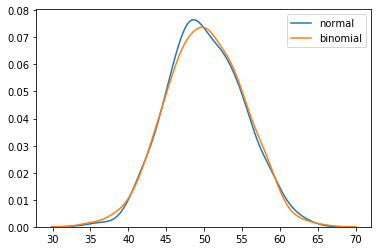

In [43]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(random.normal(loc=50, scale=5, size=1000), label='normal')
sns.kdeplot(random.binomial(100, p=0.5, size=1000), label='binomial')
plt.show()

### 사전확률

사전확률 $p(\theta)$는 베타분포를 따른다고 하자, $\theta \sim Beta(\alpha, \beta)$
베타분포를 따르는 경우, $\alpha$, $\beta$에 따라 모양이 결정된다.
두 값을 1, 1이라고 하고, 100회 무작위 샘플하면 평균값을 사전확률로 사용할 수 있다.

In [49]:
import numpy as np

np.random.beta(1,1,100).mean()

0.4432078039901476

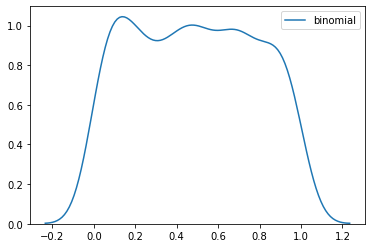

In [50]:
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='binomial')
plt.show()
#거의 균등분포

### 가능도 

이항분포 PMF Probability Mass Function은 성공(p확률) k회, 실패(1-p확률) n-k회인 경우: 

$$
f(k;n,p) = P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}
$$

choose n for k는 가능한 경우의 수를 의미한다. 순서를 무시해서 계산하면,  ->nk를 생락?

p=0.5인 이항분포에서의 확률은 $P(D|\theta) = 0.5^{30} \cdot (1−0.5)^{70}$


In [53]:
# 6회에서 앞 면이 0,1,2,3,4,5,6 나올 확률. 단 동전이 biased되어서 앞면 확률은 0.3.-> 0.5
# 확률을 구해보면:
from scipy import special
n=6
k=0
p=0.5
# comb(6,0)는 exact연산.
print (special.comb(6, k, exact=True)*(p**k)*( (1-p)**(n-k) ) )
print ((p**k)*( (1-p)**(n-k) ) ) #순서무시

0.015625
0.015625


In [54]:
for i in range(7):
    print ("Pr(X = {} heads)= {:.5f}".format(i, special.comb(6, i, exact=True)*(p**i)*( (1-p)**(n-i) ) ) )

Pr(X = 0 heads)= 0.01562
Pr(X = 1 heads)= 0.09375
Pr(X = 2 heads)= 0.23438
Pr(X = 3 heads)= 0.31250
Pr(X = 4 heads)= 0.23438
Pr(X = 5 heads)= 0.09375
Pr(X = 6 heads)= 0.01562


In [55]:
import scipy.stats as stats
for i in range(7):
    print ("{:.5f}".format(stats.binom.pmf(i,6,0.5)))

0.01563
0.09375
0.23438
0.31250
0.23438
0.09375
0.01563


### 사후 확률

베이지안 사후확률은:
$p(\theta | k,n) = \frac{\displaystyle P(k,n|\theta) P(\theta)}{\displaystyle P(k,n)}$

이식에,
* 사전확률은 베타분포,
* 가능도는 앞서 계산한 $\theta^k(1-\theta)^{n-k}$,
* 그리고 분모는 생략하여 정리하자.

그러면 아래 식으로 계산된다.

$
\begin{align}
P(C_k \vert k,n)
    & \varpropto P(k,n|\theta) P(\theta)\\
    & \varpropto \theta^k(1-\theta)^{n-k}\
        \cdot \theta^{\alpha - 1}(1-\theta)^{\beta -1}\\           
    & = \theta^{k+\alpha-1}(1-\theta)^{n-k+\beta-1}\\
    & = Beta(\theta \vert k+\alpha, n-k+\beta)
\end{align}
$
알파-1 베타-1임에유의

사전확률 $P(\theta)$이 베타분포를 따르면 $\theta \sim Beta(\alpha, \beta)$,
사후확률도 베타분포를 따르게 된다 $\theta \sim Beta(k+\alpha, n-k+\beta)$

사전, 사후확률의 확률분포를 그려보자.
* 앞서 사전확률은 $\theta \sim Beta(\alpha=1, \beta=1)$
* n=100회 던져서 k=70회가 앞면이 나왔다고 하면 가능도는 $\theta \sim Beta(\alpha=70,\beta=100-70)=Beta(\alpha=70, \beta=30)$
* 앞서 사후확률은 $\theta \sim Beta(\alpha=70+1, \beta=100-70+1)=Beta(\alpha=71, \beta=31)$

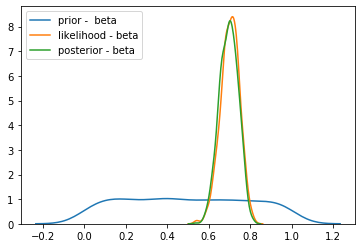

In [59]:
sns.kdeplot(random.beta(a=1, b=1, size=1000), label='prior -  beta') #prior a=1, b=1
sns.kdeplot(random.beta(a=70, b=30, size=1000), label='likelihood - beta') #likelihood a=70, b=100-70 (n=100, k=30)
sns.kdeplot(random.beta(a=71, b=31, size=1000), label='posterior - beta') #posterior a=70+1, b=100-70+1
plt.show()

그림에서 보듯이, 사후확률의 분포는 오른쪽으로 움직이고 폭이 더욱 좁아졌다.
이는 100에서 70회가 앞면이 나왔다는 사실에 더욱 확신이 증가했다는 의미이다.
평균은0.696 표준편차는 0.045, 그러니까 동전은 69.6%는 앞면이 나올 것이, 표준편차는 불과 0.045라는 의미이다.

이와 같이 가능도의 분포가 베타분포이면, 컬레확률로 사전확률과 사후확률이 베타분포를 따르고 있다.

In [60]:
import math

a=71 #posterior a=70+1, b=100-70+1 (n=100, k=30)
b=31
mu=a/(a+b)
std=math.sqrt(a*b/(math.pow(a+b,2)*(a+b+1))) #표준편차 작은 값임
f"mean: {mu:.3f} std:{std:.3f}"


'mean: 0.696 std:0.045'

### Sklearn

"Seoul", "Jongro", "Gangnam"은 한국, "Sydney","NY"는 외국이라고 이진분류하는 문제이다.

In [61]:
import numpy as np
#이항분포: 존재 유무
city_list = ["Seoul", "Jongro", "Sydney", "Gangnam", "NY"]
feature1 = [1, 0, 0, 0, 0] #서울만 발생
feature2 = [0, 1, 0, 1, 0] #종로,강남
feature3 = [0, 0, 1, 0, 0]
feature4 = [0, 0, 0, 1, 0]
feature5 = [0, 0, 1, 0, 1]
feature6 = [1, 1, 0, 0, 0]
labels = [1, 1, 0, 1, 0, 1]#한 한 외 한 외 한

numpy 배열로 6건 x 속성 5로 구성한다.

In [62]:
trainData = np.array([feature1, feature2, feature3, feature4, feature5, feature6])

In [63]:
trainData.shape

(6, 5)

```BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)```
* ```alpha```는 스무딩을 할 것인지 기본값은 1.0, 스무딩하지 않는 경우 0
* ```binarize```는 이분화를 할 경우의 임계치를 말한다. 기본 값은 0.0, 이미 이분화가 되어 있는 경우에는 None이라고 해준다.
* ```fit_prior```는 사전확률을 학습할 것인지, 기본 값은 true, false로 하면 균등분포가 사용된다.
* ```class_prior```는 클래스에 대한 사전확률

In [64]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

In [65]:
clf.fit(trainData, labels)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

모델링에 사용되었던 데이터를 그대로 예측해보자.
```labels = [1, 1, 0, 1, 0, 1]```과 동일한 결과를 출력한다.

In [66]:
clf.predict(trainData)

array([1, 1, 0, 1, 0, 1])

다음 한국만, 또는 한국과 외국이 혼합된 경우를 예측해보자.
* (1) Sydney, Gangnam, NY이 1로 한국, 외국이 혼합된 [0, 0, 1, 1, 1] 경우,
* (2) Seoul, Gangnam이 1로 한국만 포함된 [1, 0, 0, 1, 0] 경우
* (3) Seoul, Jongro, Sydney 한국과 외국이 혼합된 [1, 1, 1, 1, 0] 경우

In [67]:
testData=np.array([[0, 0, 1, 1, 1], [1, 0, 0, 1, 0], [1, 1, 1, 1, 0]])

예측하면 (1)의 경우는 0 (외국), (2)는 1 (한국), (3)은 1 (한국)으로 예측된다.
(1)은 외국이 한국보다 많아서, (3)은 한국이 많아서 설정된 가중치에 따라 추론된다.

In [68]:
clf.predict(testData)

array([0, 1, 1])

정확성은 trainData에 대해 측정한다. trainData는 label이 붙여져 있고, 반면에 testData는 label이 없다.

In [69]:
clf.score(trainData,labels)

1.0

testData에 대해 정확성을 측정하려면, label 데이터를 넣어주어야 한다.
이런 작업, 각 사례에 대해 한국인지 외국인지 판정하는 작업이 필요하다.
대량 데이터를 훈련하기 위해서는, 지도기계학습에서는 필수적으로 해야하고 상당한 시간과 노력이 필요할 수 있다.

In [70]:
clf.score(testData, [0, 1, 1])

1.0

predict_proba()는 확률추정치를 출력한다.
각 feature에 대한 가중치 역할을 하게 되고, 앞서 한국, 외국이 혼합된 사례의 추론의 이유이기도 하다.

In [72]:
clf.predict_proba(trainData) #서울,종로,강남,뉴욕..등 순 ->가중치를 곱해서 높게 나오는 쪽으로 계산

array([[0.09194098, 0.90805902],
       [0.03264813, 0.96735187],
       [0.8200225 , 0.1799775 ],
       [0.09194098, 0.90805902],
       [0.95795007, 0.04204993],
       [0.03264813, 0.96735187]])

In [73]:
pr=clf.predict_proba(trainData)

In [74]:
pr.shape, testData.shape

((6, 2), (3, 5))

## 5.7 정규분포 베이지안

**정규모델 Normal Bayesian**은 아래 몸무게, 키, 발크기로 성별을 구분하는 문제이고, 정규분포를 사용한다

height=6ft, weight=130lbs, foot size=8inches 경우 성별을 추론해보자.
키, 몸무게와 같은 연속적 변수이고, 분포 distribution에 따라 무작위로 발생한다.

* source: http://en.wikipedia.org/wiki/Naive_Bayes_classifier

| sex	 | height(feet) | weight(lbs) | foot size(inches) |
|--------|-----:|----:|---:|
| male   | 6    | 180 | 12 |
| male   | 5.92 | 190 | 11 |
| male   | 5.58 | 170 | 12 |
| male   | 5.92 | 165 | 10 |
| female | 5    | 100 |  6 |
| female | 5.5  | 150 |  8 |
| female | 5.42 | 130 |  7 |
| female | 5.75 | 150 |  9 |


### (1) 데이터 준비

numpy 구조 배열로 데이터를 생성하자.

In [75]:
import numpy as np
_hwf = np.array([
        ('male',6,180,12),
        ('male',5.92,190,11),
        ('male',5.58,170,12),
        ('male',5.92,165,10),
        ('female',5,100,6),
        ('female',5.5,150,8),
        ('female',5.42,130,7),
        ('female',5.75,150,9)],
        dtype=[('sex', 'U6'), ('height', 'f4'), ('weight', 'i4'), ('foot', 'i4')
])

### (2) 사전확률

사전확률은 전체 개수를 'male', 'female' 개수로 나눈 값이다.
위 데이터에서 남녀의 확률 (즉 4/8), 0.5이다.
또는 P(M), P(F)은 인구통계에서 보면 남녀 모두 0.5라고 봐도 무방하다. 

In [76]:
pr_m=0.5
# p(height|M) ~ N(6,남자키평균,남자키표준편차), 즉 N(6,5.855,0.187)
pr_f=0.5

In [77]:
prior_m = np.count_nonzero(_hwf['sex']=='male')/_hwf.shape[0] #4/8
prior_f = np.count_nonzero(_hwf['sex']=='female')/_hwf.shape[0] #4/8
f"prior_m: {prior_m}, prior_f: {prior_f}"

'prior_m: 0.5, prior_f: 0.5'

### (3) 가능도

확률을 구하기 위해서는 분포를 추정해야 한다. 남녀의 키, 몸무게, 발길이 정규분포로 볼 수 있다.
정규분포 확률을 계산하기 위해 평균, 표준편차이 필요하다.

#### (3-1) 정규분포 확률계산에 필요한 평균, 표준편차 계산

In [35]:
import pandas as pd
pdf=pd.DataFrame(_hwf)

In [36]:
pdf.groupby('sex').mean()

,height,weight,foot
sex,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [37]:
pdf.groupby('sex').std()

,height,weight,foot
sex,,,
female,0.311809,23.629078,1.290994
male,0.187172,11.086779,0.957427


#### (3.2) 확률 계산

남자의 경우 키가 6 feet일 확률 Pr(Height=6|Male)을 계산해보자.
이런 연속변수의 확률은 normpdf를 계산해서 구한다.
정규분포의 확률밀도함수 (pdf, Probability Dense Function)는:

$\frac{\displaystyle 1}{\displaystyle \sigma \sqrt{2\pi}}
e^{-\frac{\displaystyle 1}{\displaystyle 2}(\frac{\displaystyle x-\mu}{\displaystyle \sigma})^2}$

In [78]:
# 함수로 만들기
def normpdf(x, mu=0, std=1):
    n = float(x-mu) / abs(std)
    g = np.exp(-n*n/2) / (abs(std) * np.sqrt(2*np.pi))
    return g

#### male

In [79]:
mean_h_m=_hwf['height'][_hwf['sex']=='male'].mean()
std_h_m=_hwf['height'][_hwf['sex']=='male'].std(ddof=1)
pr_h_m=normpdf(6, mean_h_m, std_h_m) #1.5788829647561371, 확률이 아니라 확률분포값
f"Pr(Height|Male): {pr_h_m:.4f}, mean_h_m: {mean_h_m:.4f}, std_h_m: {std_h_m:.4f}"

'Pr(Height|Male): 1.5789, mean_h_m: 5.8550, std_h_m: 0.1872'

In [84]:
mean_f_m=_hwf['foot'][_hwf['sex']=='male'].mean() #11.25
std_f_m=_hwf['foot'][_hwf['sex']=='male'].std(ddof=1) #0.957
pr_f_m=normpdf(8, mean_f_m, std_f_m) #0.0013050759944537563
f"pr_f_m: {pr_f_m:.8f}, mean_f_m: {mean_f_m:.4f}, std_f_m: {std_f_m:.4f}"

'pr_f_m: 0.00131122, mean_f_m: 11.2500, std_f_m: 0.9574'

In [85]:
mean_w_m=_hwf['weight'][_hwf['sex']=='male'].mean() #176.25
std_w_m=_hwf['weight'][_hwf['sex']=='male'].std(ddof=1) #11.0868
pr_w_m=normpdf(130, mean_w_m, std_w_m) #5.9869297985549439e-06
f"pr_w_m: {pr_w_m:.8f}, mean_w_m: {mean_w_m:.4f}, std_w_m: {std_w_m:.4f}"

'pr_w_m: 0.00000599, mean_w_m: 176.2500, std_w_m: 11.0868'

#### female

In [86]:
mean_h_f=_hwf['height'][_hwf['sex']=='female'].mean() #5.4175
std_h_f=_hwf['height'][_hwf['sex']=='female'].std(ddof=1) #0.311809
pr_h_f=normpdf(6,mean_h_f,std_h_f) #0.2235
f"Pr(Height|Female): {pr_h_f:.4f}, mean_h_f: {mean_h_f:.4f}, std_h_f: {std_h_f:.4f}"

'Pr(Height|Female): 0.2235, mean_h_f: 5.4175, std_h_f: 0.3118'

In [87]:
mean_f_f=_hwf['foot'][_hwf['sex']=='female'].mean() #7.5
std_f_f=_hwf['foot'][_hwf['sex']=='female'].std(ddof=1) #1.291
pr_f_f=normpdf(8,mean_f_f,std_f_f) #0.2867
f"Pr(Foot|Female): {pr_f_f:.4f}, mean_f_f: {mean_f_f:.4f}, std_f_f: {std_f_f:.4f}"

'Pr(Foot|Female): 0.2867, mean_f_f: 7.5000, std_f_f: 1.2910'

In [88]:
mean_w_f=_hwf['weight'][_hwf['sex']=='female'].mean() #132.5
std_w_f=_hwf['weight'][_hwf['sex']=='female'].std(ddof=1) #23.629
pr_w_f=normpdf(130,mean_w_f,std_w_f) #0.0168
f"Pr(Weight|Female): {pr_w_f:.4f}, mean_w_f: {mean_w_f:.4f}, std_w_f: {std_w_f:.4f}"

'Pr(Weight|Female): 0.0168, mean_w_f: 132.5000, std_w_f: 23.6291'

### (4) 사후확률

$
posterior(M)=\frac{P(M)\ p(height|M)\ p(weight|M)\ p(foot size|M)}{evidence}\\
posterior(F)=\frac{P(F)\ p(height|F)\ p(weight|F)\ p(foot size|F)}{evidence}
$

위 식에서 Evidence는 이 값은 상수 값이므로, 사후확률 계산에서 제외한다.

In [89]:
post_m=pr_m * pr_h_m * pr_f_m * pr_w_m #6.1682207841818461e-09
post_f=pr_f*pr_h_f*pr_w_f*pr_f_f #0.00053778969521895402
f"사후확률 male: {post_m:.8f}, 사후확률 female: {post_f:.8f}"

'사후확률 male: 0.00000001, 사후확률 female: 0.00053779'

### (5) 추론

4. argmax를 구하면 1, 즉 post_f일 확률이 높으므로, 여성이라고 구분함.

In [90]:
np.argmax([post_m,post_f]) #1 즉 female로 예측.

1

### (6) Sklearn

```python
GaussianNB(*, priors=None, var_smoothing=1e-09)
```
* 사전확률
* smoothing

#### 데이터

In [91]:
X=_hwf[:][['height', 'weight', 'foot']]
y=_hwf[:]['sex'] #모든 행에 대하여 성별만

튜플리스트를 2차원 리스트로 변환해주자.

In [94]:
X = [list(x) for x in X]

In [95]:
X

[[6.0, 180, 12],
 [5.92, 190, 11],
 [5.58, 170, 12],
 [5.92, 165, 10],
 [5.0, 100, 6],
 [5.5, 150, 8],
 [5.42, 130, 7],
 [5.75, 150, 9]]

In [96]:
y

array(['male', 'male', 'male', 'male', 'female', 'female', 'female',
       'female'], dtype='<U6')

#### GaussianNB

In [97]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)
Y_gnb_score = gnb.predict_proba(X)

In [98]:
Y_gnb_score 

array([[1.01445408e-06, 9.99998986e-01],
       [1.68038573e-05, 9.99983196e-01],
       [7.74236193e-05, 9.99922576e-01],
       [5.73512178e-03, 9.94264878e-01],
       [1.00000000e+00, 4.96400751e-27],
       [9.99992023e-01, 7.97745444e-06],
       [1.00000000e+00, 2.62669718e-12],
       [9.82692514e-01, 1.73074857e-02]])

클래스를 출력할 수 있다.

In [99]:
gnb.classes_ # 숫자든 문자든 명목변수면 잘 됨

array(['female', 'male'], dtype='<U6')

In [100]:
gnb.class_count_

array([4., 4.])

In [101]:
gnb.class_prior_

array([0.5, 0.5])

In [103]:
gnb.theta_

array([[  5.41750002, 132.5       ,   7.5       ],
       [  5.85500002, 176.25      ,  11.25      ]])

In [105]:
gnb.sigma_

array([[7.29194841e-02, 4.18750001e+02, 1.25000073e+00],
       [2.62757494e-02, 9.21875007e+01, 6.87500734e-01]])

####  예측

In [9]:
gnb.predict([[6,130,8],[6,180,12]])

array(['female', 'male'], dtype='<U6')

In [109]:
gnb.predict([[7,122,7],[6,140,8]])

array(['female', 'female'], dtype='<U6')